In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 11pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 11pt; line-height: 140%;}</style>"))

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import warnings 
warnings.filterwarnings(action='ignore')

# data load

In [4]:
path = './data/'

In [5]:
train_raw = pd.read_csv(path+'train.csv', encoding = 'utf-8')    
test_raw = pd.read_csv(path+'test.csv', encoding = 'utf-8')
submission = pd.read_csv(path+'sample_submission.csv', encoding = 'utf-8')

In [6]:
train_raw.head(2)

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2016-02-01  월   2601      50     150             238          0.0   
1  2016-02-02  화   2601      50     173             319          0.0   

                                                조식메뉴  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                석식메뉴     중식계    석식계  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0

In [7]:
test_raw.head(2)

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0  2021-01-27  수   2983      88     182               5        358.0   
1  2021-01-28  목   2983     104     212             409        348.0   

                                                조식메뉴  \
0  모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1  모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   

                                                중식메뉴  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   

                                            석식메뉴  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지

In [8]:
print(' train shape: ', train_raw.shape, '\n', 'test shape: ', test_raw.shape)

 train shape:  (1205, 12) 
 test shape:  (50, 10)


# 전처리

In [9]:
# 칼럼명 수정하기 
train = train_raw.copy()
train.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn', 'target_ln', 'target_dn']
train.head(2)

date dow  employees  dayoff  bustrip  ovtime  remote  \
0  2016-02-01   월       2601      50      150     238     0.0   
1  2016-02-02   화       2601      50      173     319     0.0   

                                                 brk  \
0  모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1  모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   

                                                  ln  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   

                                                  dn  target_ln  target_dn  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...     1039.0      331.0  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...      867.0      560.0

In [10]:
test = test_raw.copy()
test.columns = ['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'brk', 'ln', 'dn']
test.head(2)

date dow  employees  dayoff  bustrip  ovtime  remote  \
0  2021-01-27   수       2983      88      182       5   358.0   
1  2021-01-28   목       2983     104      212     409   348.0   

                                                 brk  \
0  모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1  모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   

                                                  ln  \
0  쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...   
1  쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...   

                                              dn  
0  흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치   
1            충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지

## 날짜 요일

In [11]:
def to_datetime(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['dow'] = pd.to_datetime(df[date]).dt.weekday + 1
to_datetime(train, 'date'); to_datetime(test, 'date')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1205 non-null   datetime64[ns]
 1   dow        1205 non-null   int64         
 2   employees  1205 non-null   int64         
 3   dayoff     1205 non-null   int64         
 4   bustrip    1205 non-null   int64         
 5   ovtime     1205 non-null   int64         
 6   remote     1205 non-null   float64       
 7   brk        1205 non-null   object        
 8   ln         1205 non-null   object        
 9   dn         1205 non-null   object        
 10  target_ln  1205 non-null   float64       
 11  target_dn  1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


## 메뉴명

In [13]:
train.columns

Index(['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote',
       'brk', 'ln', 'dn', 'target_ln', 'target_dn'],
      dtype='object')

In [14]:
train['brk'][0]

'모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) '

In [15]:
train['ln'][0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '

In [16]:
train['dn'][0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침  포기김치 (김치:국내산) '

In [17]:
train.index

RangeIndex(start=0, stop=1205, step=1)

In [18]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ') # 공백으로 문자열 구분 
    tmp = ' '.join(tmp).split()    # 빈 원소 삭제

    search = '('   # 원산지 정보는 삭제
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp) 

In [19]:
lunch[0:5]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

In [20]:
lunch[1065:1070]   # 1067 행 기준으로 김치와 사이드의 순서가 바뀜

[['쌀밥/잡곡밥', '매운소고기국', '굴비구이', '토마토프리타타', '도라지오이무침', '배추겉절이'],
 ['돈육버섯고추장덮밥', '팽이무국', '양파링카레튀김', '모듬어묵볶음', '참나물생채', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순볶음', '포기김치', '양상추샐러드*딸기요거트'],
 ['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반', '배추겉절이', '양상추샐러드*오리엔탈'],
 ['카레라이스', '동태알탕', '부추고추전*간장', '쫄면야채무침', '과일요거트샐러드', '포기김치', '요구르트']]

In [21]:
np.array(train[ (train.index>1064) & (train.index < 1069)][['date','ln']])

array([[Timestamp('2020-06-11 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       [Timestamp('2020-07-02 00:00:00'),
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

In [22]:
# lunch train data에 메뉴명별 칼럼 만들기 (밥, 국, 반찬1-3)
bob = []; gook = []; banchan1 = []; banchan2 = []; banchan3 = []; kimchi = []; side = []
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else: 
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp  = day_menu[-1]; side.append(side_tmp)
    

In [23]:
train_ln = train[['date', 'dow', 'employees', 'dayoff', 'bustrip', 'ovtime', 'remote', 'ln', 'target_ln']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side

In [24]:
train_ln.drop

<bound method DataFrame.drop of            date  dow  employees  dayoff  bustrip  ovtime  remote  \
0    2016-02-01    1       2601      50      150     238     0.0   
1    2016-02-02    2       2601      50      173     319     0.0   
2    2016-02-03    3       2601      56      180     111     0.0   
3    2016-02-04    4       2601     104      220     355     0.0   
4    2016-02-05    5       2601     278      181      34     0.0   
...         ...  ...        ...     ...      ...     ...     ...   
1200 2021-01-20    3       2983      75      198       4   391.0   
1201 2021-01-21    4       2983      92      231     462   351.0   
1202 2021-01-22    5       2983     255      248       1   303.0   
1203 2021-01-25    1       2983     107      153     616   327.0   
1204 2021-01-26    2       2983      69      183     551   362.0   

                                                     ln  target_ln  \
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...     1039.0   
1     쌀밥/잡곡

## 점심메뉴 둘러보기

In [25]:
gook_df = pd.DataFrame(train_ln['gook'].value_counts().reset_index())

In [26]:
gook_df.head()

index  gook
0    맑은국    46
1   콩나물국    44
2   된장찌개    37
3    어묵국    31
4  배추된장국    28

In [27]:
gook_df.tail()

index  gook
267     홍합국     1
268  콩나물김칫국     1
269  돼지김치찌개     1
270   유부된장국     1
271  매운쇠고기국     1

In [28]:
gook_df.describe()

gook
count  272.000000
mean     4.430147
std      7.022545
min      1.000000
25%      1.000000
50%      1.000000
75%      5.000000
max     46.000000

In [29]:
# 반찬 1~3 
train_ln[f'banchan1'][0:3]

0     쇠불고기
1    가자미튀김
2     치킨핑거
Name: banchan1, dtype: object

In [30]:
train_ln.drop('ln', axis =1).head(2)

date  dow  employees  dayoff  bustrip  ovtime  remote  target_ln  \
0 2016-02-01    1       2601      50      150     238     0.0     1039.0   
1 2016-02-02    2       2601      50      173     319     0.0      867.0   

      bob   gook banchan1 banchan2 banchan3 kimchi  side  
0  쌀밥/잡곡밥  오징어찌개     쇠불고기      계란찜    청포묵무침   포기김치  요구르트  
1  쌀밥/잡곡밥   김치찌개    가자미튀김  모둠소세지구이    마늘쫑무침  배추겉절이  요구르트

In [31]:
banchan_lst = []
for i in range(3):
    tmp = train_ln[f'banchan{i+1}']
    for j in range(len(train_ln)):
        tmp2 = tmp[j]
        banchan_lst.append(tmp2)

In [32]:
len(banchan_lst)

3615

In [33]:
banchan_df = pd.DataFrame(pd.DataFrame(banchan_lst).value_counts())

In [34]:
banchan_df.columns = ['banchan']
banchan_df.reset_index(inplace = True)
banchan_df.columns = ['index', 'banchan']

In [35]:
banchan_df.head()

index  banchan
0   오이무침       35
1  오징어볶음       32
2    닭갈비       30
3  버섯불고기       29
4  콩나물무침       28

In [36]:
banchan_df.tail()

index  banchan
1169      봉추찜닭        1
1170    부들어묵볶음        1
1171   부추고추장무침        1
1172  부추고추전*간장        1
1173   히레카츠*소스        1

In [37]:
banchan_df.banchan.describe()

count    1174.000000
mean        3.079216
std         4.371070
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: banchan, dtype: float64

# 시각화

## 점심 저녁 이용자

In [38]:
train_ln.drop('ln', axis=1).head(1)

date  dow  employees  dayoff  bustrip  ovtime  remote  target_ln  \
0 2016-02-01    1       2601      50      150     238     0.0     1039.0   

      bob   gook banchan1 banchan2 banchan3 kimchi  side  
0  쌀밥/잡곡밥  오징어찌개     쇠불고기      계란찜    청포묵무침   포기김치  요구르트

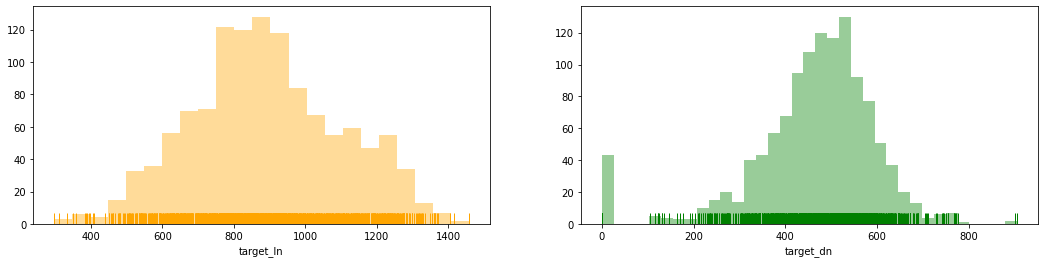

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["target_ln"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train["target_dn"], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

## 코로나

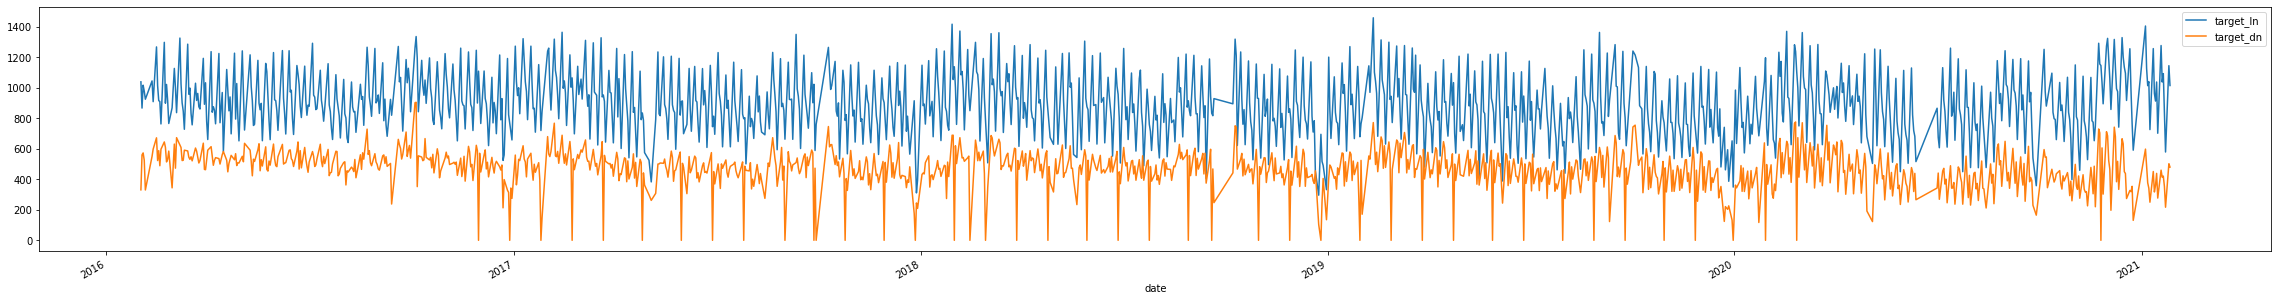

In [40]:
train.plot(x = 'date', y = ['target_ln', 'target_dn'], figsize = (40, 5))
plt.show()

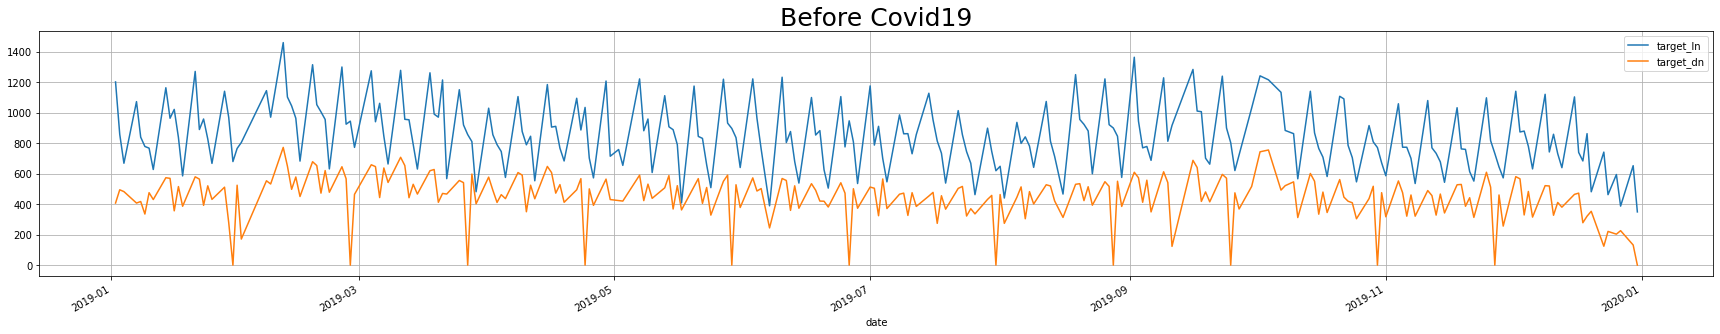

In [41]:
before_covid = train[train['date'].dt.year == 2019][['date', 'target_ln', 'target_dn']]
before_covid.plot(x = 'date', y = ['target_ln', 'target_dn'], figsize = (30, 5), grid = True)
plt.title('Before Covid19', fontsize = 25)
plt.show()

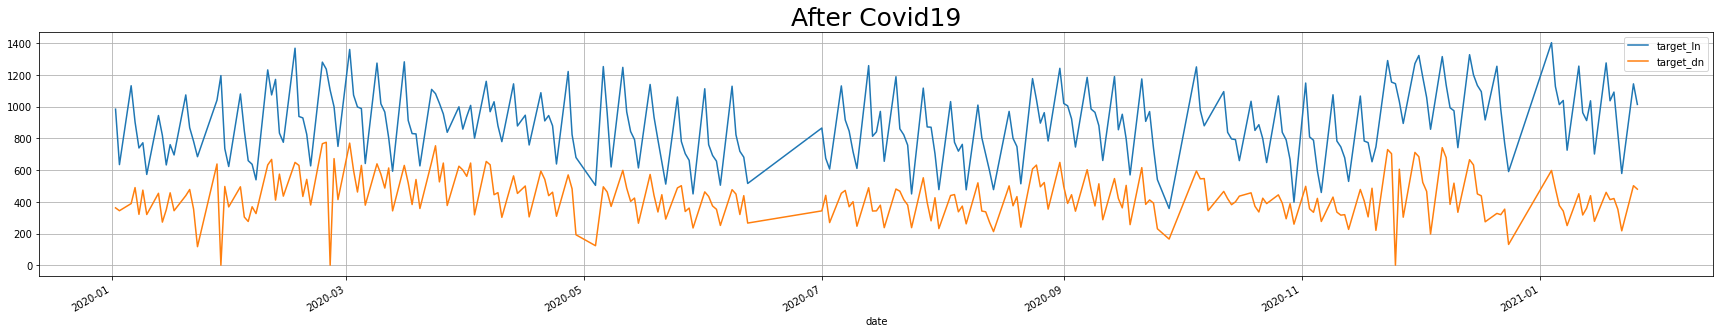

In [42]:
after_covid = train[train['date'].dt.year >= 2020][['date', 'target_ln', 'target_dn']]
after_covid.plot(x = 'date', y = ['target_ln', 'target_dn'], figsize = (30, 5), grid = True)
plt.title('After Covid19', fontsize = 25)
plt.show()

In [43]:
print('점심:', '2019년에는', round(before_covid.target_ln.mean(), 2), ', 2020년에는', round(after_covid.target_ln.mean(), 2))
print('저녁:', '2019년에는', round(before_covid.target_dn.mean(), 2), ', 2020년에는', round(after_covid.target_dn.mean(), 2))

점심: 2019년에는 850.51 , 2020년에는 890.97
저녁: 2019년에는 445.39 , 2020년에는 428.34


In [48]:
# 저녁 이용자 수가 0명인 날 들
train[train.target_dn == 0][['date',  'dayoff', 'bustrip', 'ovtime', 'remote', 'dow', 'dn', 'target_dn']]

date  dayoff  bustrip  ovtime  remote  dow  \
204  2016-11-30      68      207       0     0.0    3   
224  2016-12-28     166      225       0     0.0    3   
244  2017-01-25      79      203       0     0.0    3   
262  2017-02-22      75      252       0     0.0    3   
281  2017-03-22      53      235       0     0.0    3   
306  2017-04-26      45      304       0     0.0    3   
327  2017-05-31      43      265       0     0.0    3   
346  2017-06-28      58      259       0     0.0    3   
366  2017-07-26     254      246       0     0.0    3   
392  2017-09-01     177      303      45     0.0    5   
410  2017-09-27      70      265       0     0.0    3   
412  2017-09-29     214      248      22     0.0    5   
424  2017-10-25      75      289       0     0.0    3   
449  2017-11-29      78      261       0     0.0    3   
468  2017-12-27     169      255       0     0.0    3   
492  2018-01-31      56      223       0     0.0    3   
502  2018-02-14     418      159       0     0.0    3   
510  2018-02-28     134      278       0     0.0    3   
529  2018-03-28      45      252       0     0.0    3   
549  2018-04-25      66      285       0     0.0    3   
571  2018-05-30      80      281       0     0.0    3   
589  2018-06-27      66      277       0     0.0    3   
609  2018-07-25     226      256       1     0.0    3   
633  2018-08-29     103      258       0     0.0    3   
648  2018-09-19      77      288       0     0.0    3   
667  2018-10-31     111      306       0     0.0    3   
687  2018-11-28      69      298       1     0.0    3   
706  2018-12-26     184      241       0     0.0    3   
730  2019-01-30      66      226       1     0.0    3   
747  2019-02-27     100      274       0     0.0    3   
766  2019-03-27      92      259       0     0.0    3   
786  2019-04-24      59      273       0     0.0    3   
809  2019-05-29      50      237       0     0.0    3   
828  2019-06-26      69      282       0     0.0    3   
853  2019-07-31     495      231       0     0.0    3   
872  2019-08-28     123      274       0     0.0    3   
890  2019-09-25      60      285       1     0.0    3   
912  2019-10-30     122      294       1     0.0    3   
932  2019-11-27     134      288       1     0.0    3   
955  2019-12-31     709      149      22     0.0    2   
973  2020-01-29     101      214       4     0.0    3   
993  2020-02-26     109      190       4     0.0    3   
1166 2020-11-25     206      191       3   387.0    3   

                                                     dn  target_dn  
204                                           *                0.0  
224                                           *                0.0  
244                                            *               0.0  
262                                           *                0.0  
281                                           *                0.0  
306                                           *                0.0  
327                                        자기계발의날              0.0  
346                                      *자기계발의날*              0.0  
366                                          가정의날              0.0  
392                                           *                0.0  
410   쌀밥/잡곡밥 (쌀:국내산) 된장찌개  미니함박조림  계란말이  비름나물  포기김치 ...        0.0  
412                                           *                0.0  
424                                           *                0.0  
449                                           *                0.0  
468                                           *                0.0  
492                                           *                0.0  
502   쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국  고추잡채*꽃빵  계란찜  오이무침  포기김치...        0.0  
510                                           *                0.0  
529                                             *              0.0  
549                                                            0.0  
571                                                  